# Exercise 1
### Name: Esther Whang
### JHID: ewhang2
### language: Python

In [1]:
from google.colab import drive
import os
drive.mount("/content/drive")
os.chdir("drive/MyDrive/google_drive_hopkins/spring_24/neural_signals_class/hw1/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git clone https://github.com/Esther-Whang-PhD/Neural_Signals_and_Computation_ewhang2_GitHUB


Cloning into 'Neural_Signals_and_Computation_ewhang2_GitHUB'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 20 (delta 8), reused 17 (delta 8), pack-reused 0
Receiving objects: 100% (20/20), 6.70 KiB | 761.00 KiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import os
os.chdir('Neural_Signals_and_Computation_ewhang2_GitHUB')

# PROBLEM 1


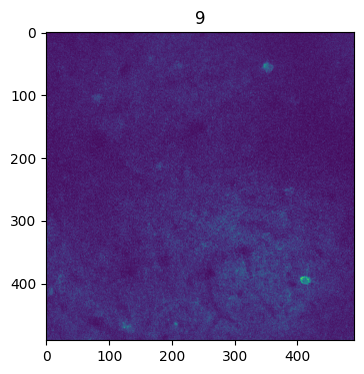

Problem 1.B
Frame 1 and 7 have biggest shift
Frame 1 and 5 as comparison
Biggest Shift


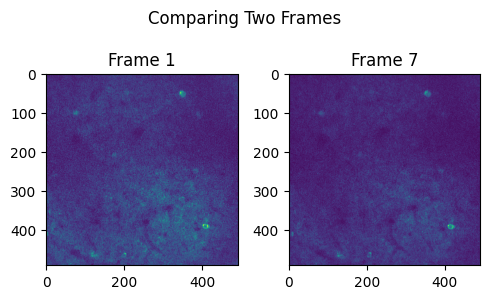

245 245
Correlation Peak is at
245 240
X-Shift of 0
Y-Shift of -5
Different Shift


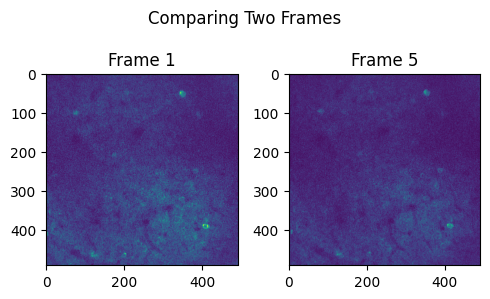

245 245
Correlation Peak is at
246 242
X-Shift of 1
Y-Shift of -3


In [4]:
from ewhang2_problem_1_ex_1 import Problem1
# TEST MOVIE 00001-small-motion.tif. This file represents the raw fluorescence video in TIF format,
# common for calcium imaging.
problem_1 = Problem1()
#
# Part A
# Write a script to play the data as a video (for Python users, look up the package plotly).
# Observe the changes in the video as a function of time and how the neurons “wiggle”.
problem_1.part_A(num_of_frames = 500)
# HW Response
# Animation done with Matplotlib due to issues with Plotly in Google Colabs

#
# Part B
# Pick two frames that seem to be particularly offset from each other. Compute their
# correlation, and repeat for different shifts in space. Where is the correlation peak?
problem_1.part_B(1, 7, 5)
# HW Response
# Frames 1 and 7 identified as biggest shift. The correlation peaks are printed in the output.
# Correlation Peak is at 245 240, with X-Shift of 0 and Y-Shift of -5
# Frame 1 and 5 is the different shift in space.


# PROBLEM 2


Problem 2.A
Problem 2.B


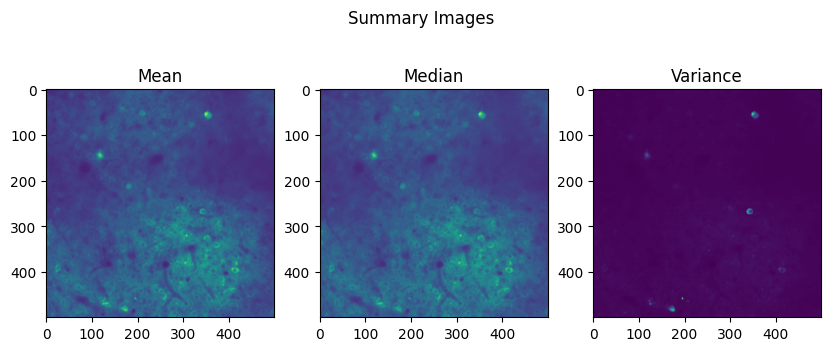

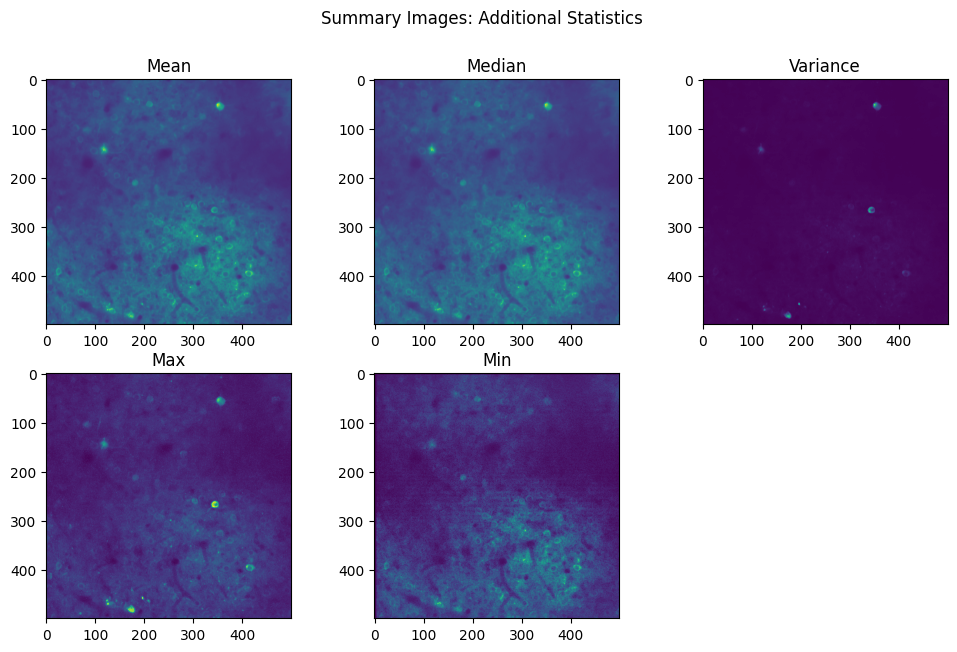

In [5]:
from ewhang2_problem_2_ex_1 import Problem2
# Load up the calcium image video in the file:
# TEST MOVIE 00001-small.tif. This file represents the raw fluorescence video in TIF format, but without the motion.
# One of the most common ways that people analyze functional data is to try to identify individual cells in the data in a “summary image”. A summary image condenses an entire
# video sequence into a single image, wherein each pixel represents a summary of the entire time-trace
# at the location of that pixel in the video.
problem_2 = Problem2()
#
# Part A
# Plot the “mean”, “median”, and “variance” images for the data provided.
# What do you notice about the visible cells in each of these?
problem_2.part_A()
# HW Response
# Mean and Median are very similar. Variance is the most interesting,
# as we see the cells with the biggest range of activity.

#
# Part B
# What would you expect a good statistic for a summary image to capture? What other
# statistics would you think could work? Try out 1-2 others: were you right?
problem_2.part_B()
# HW Response
# A good statistic would pick out the most active cells, which is one of the reasons
# variance is a good statistic. Max and Min could work, as it would show the extremes
# in activity. The Max shows the largest activity, while the Min isn't particularly helpful.

# PROBLEM 3

Problem 3.A
Template Matching: Create a Ring Template
Blur Variance Summary Image
Find the Correlation between the Ring Template and the Blurred Variance Summary Image
Create a Mask using the Correlation Image
Detect Contours from the Mask using OpenCV
Congratulations! You've found the 5 ROI required for this homework.
Your ROI are located at: 
[[118 145]
 [173 482]
 [342 268]
 [353  56]
 [414 396]]
Problem 3.B
Looking at Summary Images to Evaluate ROI


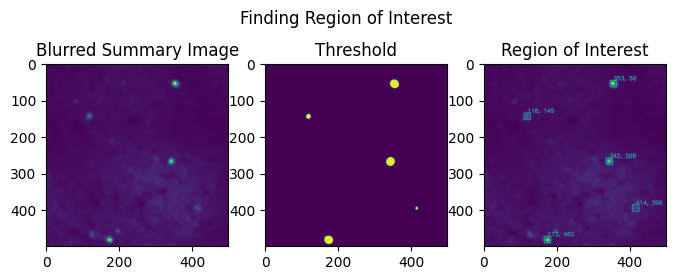

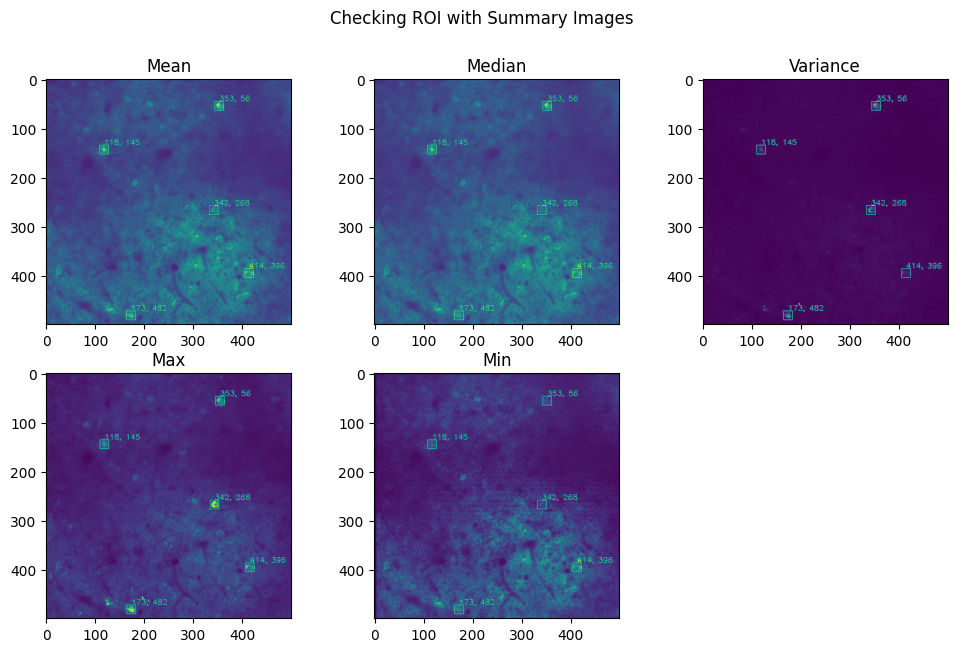

In [6]:
from ewhang2_problem_3_ex_1 import Problem3
# Given the summary images, the next step is to draw ROIs around the image to isolate the pixels
# belonging to a specific cell.
problem_3 = Problem3(problem_2.tif_small)
#
# Part A
# Write a short script that takes in a summary image and potentially other information
# (i.e., a seed pixel selected by the user), and outputs a binary mask over an ROI. Find 5 different
# ROIs in the data provided.
problem_3.part_A()
# HW Response
# Steps for finding ROI
# Create a Ring Template
# Blur Variance Summary Image
# Find the Correlation between the Ring Template and the Blurred Variance Summary Image
# Create a Mask using the Correlation Image
# Detect Contours from the Mask using OpenCV
# Save the centers of the contours to get the ROI

#
# Part B
# How might you assess how good your script did?
problem_3.part_B()
# HW Response
# We can use the Summary Images and see if the ROI covers the cells seen in the images.
# The Second Plot shows all the summary images with the ROI labels. As we can see,
# the ROI contains the cells in each of the summary images.

# PROBLEM 4

Problem 4.A
Problem 4.B


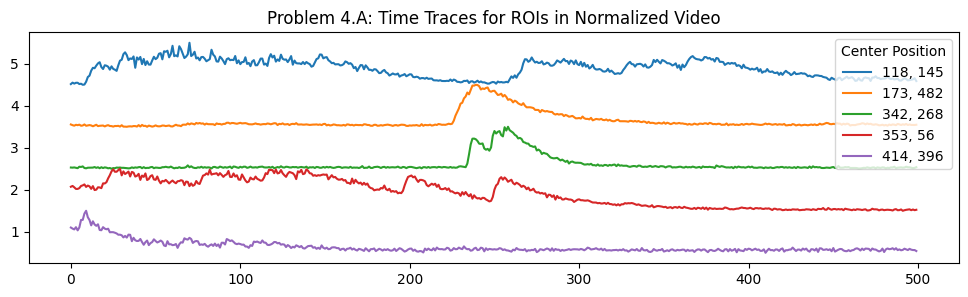

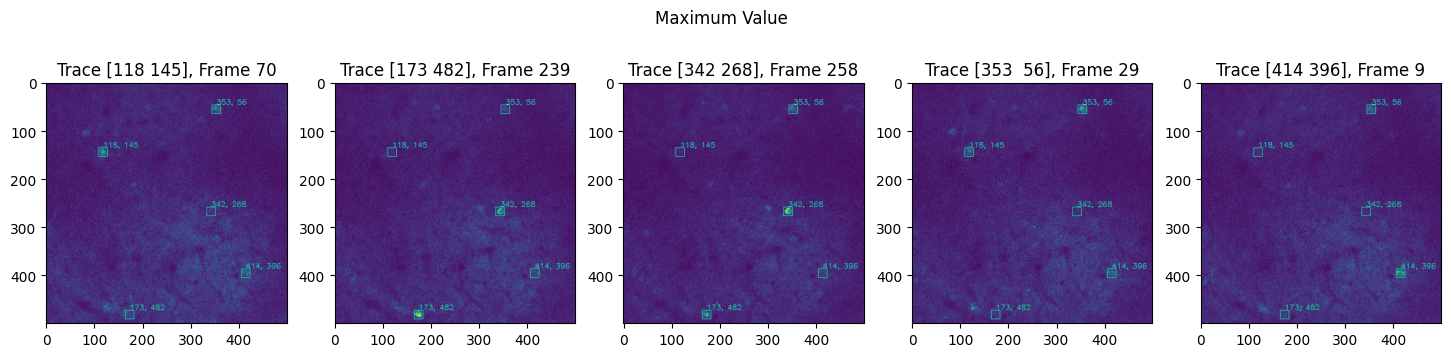

In [7]:
from ewhang2_problem_4_ex_1 import Problem4
# With the ROIs, time-traces need to be extracted by identifying the relative brightness of that region
# of interest in each frame.
problem_4 = Problem4(problem_2.tif_small, problem_3.centers)
#
# Part A
# Write a function that identifies, for the ROIs identified in Problem 2, their time-traces.
# Describe your approach.
problem_4.part_A()
# HW Response
# I took the patch of the ROI and sum the pixels in the patch for every frame. I
# then normalize the summed patches across all frames. The summation and normalization
# is an attempt to reduce the noise of the time trace.

#
# Part B
# Do you think that the time-traces reflect the actual activity in the video?
# How might you test if they are accurate?
problem_4.part_B()
# HW Response
# I think the time-traces reflect the activity. I test the accuracy by finding the
# frame with the brightest activity for a particular ROI, and visually checking
# whether that ROI is indeed active at that frame.

# PROBLEM 5

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


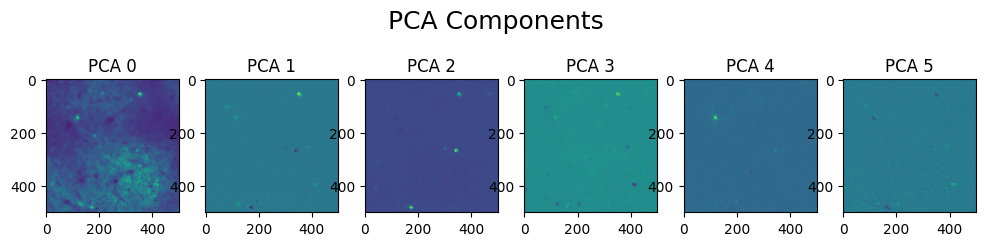

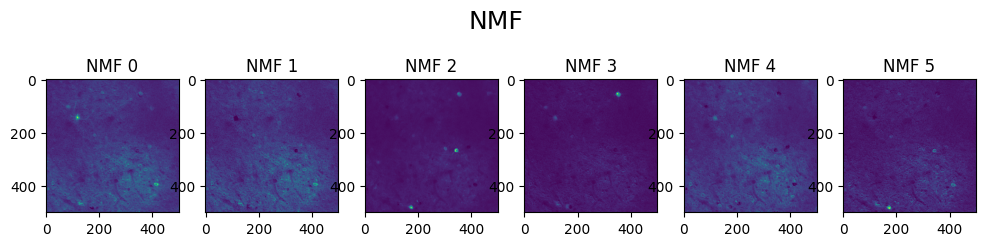

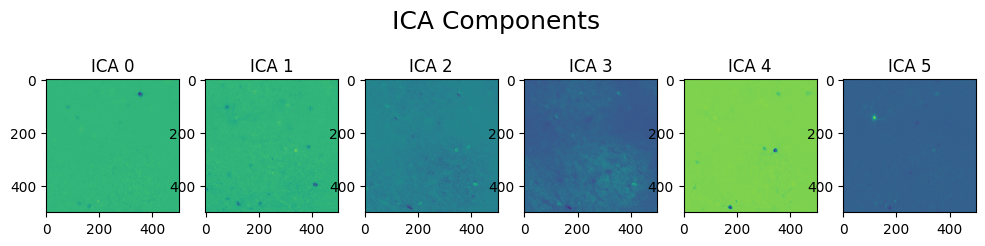

In [11]:
from ewhang2_problem_5_ex_1 import Problem5

# The above procedure is common in many labs, however can cause errors due to the dependency on
# the summary image and the multiple stages of processing. Matrix factorization has emerged as an
# alternative approach for identifying ROIs from the full spatio-temporal video. Here we will explore
# three different types of factorization and compare the results using a table.
problem_5 = Problem5(problem_2.tif_small)

#
# Part A
# Run PCA on the pixels-by-time matrix obtained by vectorizing each frame into a column
# vector. How does the result change with the number of principal components you choose?
problem_5.part_A()
# HW Response
# A larger number of principal components don't seem to help - the first component
# seems really similar to the original volume. The later principal components
# are fairly redundant in the cells it picks out, and the much later principal components
# seem to be background nosie.

#
# Part B
# Run NMF on the pixels-by-time matrix as in part A, for a specific number of components
# that you find reasonable. What are the differences that you note? Is there a similar dependency
# on the rank of the decomposition?
problem_5.part_B()
# HW Response
# There seems to be less of a dependence on the rank of the decomposition? The components
# aren't drastically different between the first component and the other components like
# in PCA. There is more variation, however, in which cells are highlighted.

#
# Part C
# Now try ICA for the same pixels-by-time matrix as in part A (for a specific number of
# components you find reasonable). What are the differences that you note?
problem_5.part_C()
# HW Response
# ICA seems to be better at making a "mask" - each frame in the plot below shows the
# the cells much more than the background, with the last frame seems to be mainly noise.